In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import rcParams
from sklearn.metrics.pairwise import manhattan_distances
import operator
from sklearn.metrics.pairwise import paired_distances
sns.set()
# figure size in inches
rcParams['figure.figsize'] = 7, 5

# Instructions

This notebook contains code to generate 2 dimensional data, run K-means on it, and visualize a heatmap. 

You can modify different parameters to change how the data is generated. You can modify: 1) the number of clusters, 2) where the clusters are located, and 3) the within-cluster variance (cohesion). Modifying the parameters will allow you to visualize different heatmaps for different kinds of data. **Note: The heatmaps are built on manhattan distance, so lower values are better.**

- heatmap_n_samples : This variable controls the number of points to generate
- heatmap_cluster_std: This variable controls the within-cluster variance
- heatmap_centers: This variable controls the position of the cluster centers (the length of this array = number of centers)

Download this notebook and open it in jupyter notebook. You will need these libraries: numpy, pandas, scikit-learn, scipy, matplotlib, seaborn.

# Cluster Heatmap
### Modify these values and run the next cell to generate different heatmaps

In [4]:
heatmap_n_samples = 100
heatmap_cluster_std = 0.1
heatmap_centers = [[0, 0], [1, 1], [2, 0]]

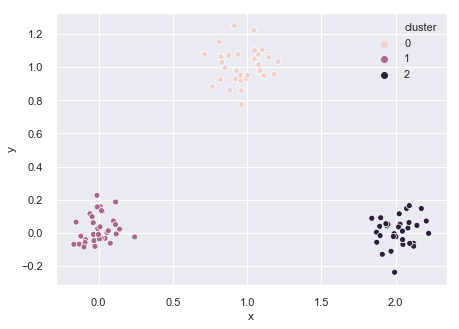

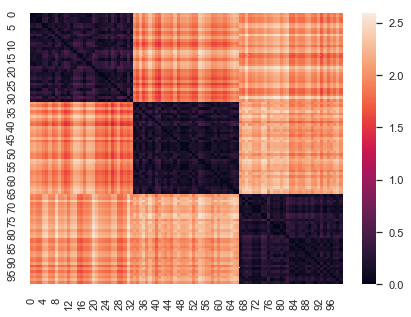

In [5]:
# Create dataset and cast into a dataframe
X, y = make_blobs(n_samples=heatmap_n_samples, n_features=2, centers=heatmap_centers, 
                  cluster_std=heatmap_cluster_std, random_state=5)
X = pd.DataFrame(X, columns=['x', 'y'])


# Run Kmeans and sort the points according to the cluster labels
kmeans = KMeans(n_clusters=len(heatmap_centers), max_iter=1000)
kmeans.fit(X)
X['cluster'] = kmeans.labels_
X = X.sort_values('cluster')

# Create a distance matrix of the points
dist_mat = pd.DataFrame(manhattan_distances(X[['x', 'y']], X[['x', 'y']]))


# Plot the clusters
sns.scatterplot(x='x', y='y', data=X, hue='cluster')
plt.show()


# Plot a heatmap
sns.heatmap(dist_mat)
plt.show()

# Finding the number of clusters in a dataset

### Modify these values and run the next cell

In [6]:
# Modify these values 
n_samples = 100
centers = 5
k_min = 2
k_max = 10

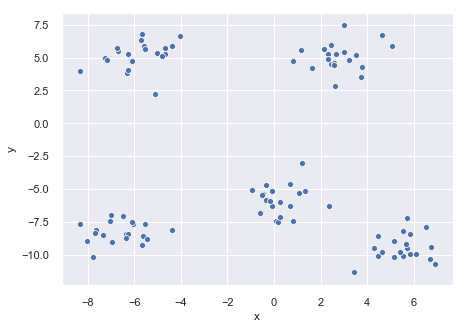

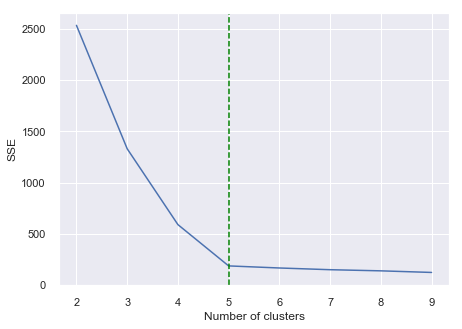

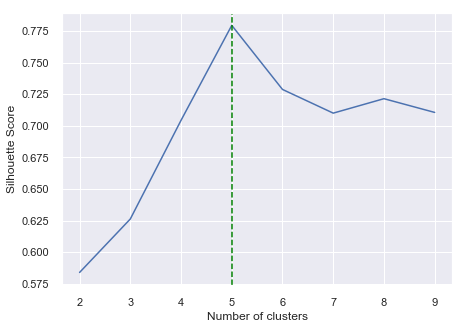

In [24]:
# Create dataset and cast into a dataframe
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=centers, random_state=10)
X = pd.DataFrame(X, columns=['x', 'y'])

# Plot the clusters
sns.scatterplot(x='x', y='y', data=X)
plt.show()

# Run Kmeans and sort the points according to the cluster labels
sse = {}
sil = {}
for k in range(k_min, k_max):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    sil[k] = silhouette_score(X, kmeans.labels_)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.axvline(centers, color='green', linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
x = max(sil.items(), key=operator.itemgetter(1))[0]
plt.axvline(x, color='green', linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()